In [1]:
import numpy as np
import pandas as pd
import os

#df=pd.read_csv("data.csv")
#df.head()


In [9]:
pwd

'C:\\Users\\HP'

In [2]:
df=pd.read_csv(r"C:\Users\HP\Desktop\fake_or_real_news.csv")

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [67]:
#df.count()
df.shape

(6335, 4)

In [8]:
df['text'][0]

'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that the entir

In [9]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [10]:
X=df['text']
y=df['label']


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=53)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [13]:
count_vectorizer=CountVectorizer(stop_words='english')
count_train=count_vectorizer.fit_transform(X_train)
count_test=count_vectorizer.transform(X_test)


In [68]:
print(count_vectorizer.get_feature_names()[:100])#from o to10

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km', '001', '0011', '002', '003', '004', '006', '006s', '007', '007s', '008', '008s', '009', '0099', '00am', '00p', '00pm', '01', '010', '013', '014', '015', '016', '018', '01am', '02', '020', '022', '023', '024', '025', '027', '028', '02welcome', '03', '031', '032', '0325', '033', '034', '035', '037', '039', '03eb', '04', '040', '0400', '042', '044', '048', '049', '04pm', '05', '0509245d29', '052', '056', '06', '062', '066', '068', '06pm', '07', '0700', '075', '076', '079', '07dryempjx', '08', '080', '081', '082', '084', '089', '0891', '09', '098263', '09am', '09pm', '0_jgdktlmn', '0a_merrill', '0d', '0fjjvowyhg8qtskiz', '0h4at2yetra17uxetni02ls2jeg0mty45jrcu7mrzsrpcbq464i', '0hq3vb2giv', '0in', '0jsn6pjkan', '0oeekvljlt', '0pt', '0t5', '0txrbwvobzz4fi5nksw6k5a6cxzbb3juxthmdiz93cby8gvrqiypzhajvjnt2', '0womdwalmi']


In [15]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
nb_classifier=MultinomialNB()
nb_classifier.fit(count_train,y_train)
pred=nb_classifier.predict(count_test)
print('accuracy',metrics.accuracy_score(y_test,pred))

accuracy 0.893352462936394


In [19]:
import itertools 

Confusion matrix, without normalization


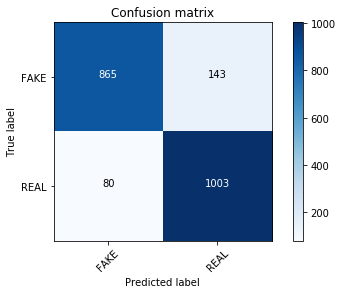

In [22]:
import matplotlib.pyplot as plt
cm=metrics.confusion_matrix(y_test,pred,labels=['FAKE','REAL'])


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


In [23]:
alpha=np.arange(0,1,0.1)
accuracy=np.zeros((10))
for i,alpha in enumerate(alpha):
    nb_classifier=MultinomialNB(alpha=alpha)
    nb_classifier.fit(count_train,y_train)
    pred=nb_classifier.predict(count_test)
    accuracy[i]=metrics.accuracy_score(y_test,pred)
accuracy
    

C:\Users\anaconda\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


array([0.88474414, 0.89287422, 0.89239598, 0.89335246, 0.89335246,
       0.89430894, 0.8938307 , 0.89287422, 0.89287422, 0.89287422])

maximum accuracy is 0.8943089430894309 at alpha equals to 0.5


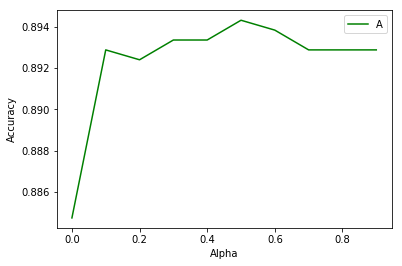

In [24]:
#str=input('enter a string')
x=np.arange(0,1,0.1)
plt.plot(x,accuracy,'g')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend('Accuracy')
print('maximum accuracy is',accuracy.max(),'at alpha equals to',accuracy.argmax()/10)
    

In [44]:
X_test[975]

'The Obama administration announced Friday it will temporarily halt new coal leases on federal lands until it completes a comprehensive review to determine whether fees charged to mining companies provide a “fair return” to taxpayers.\n\nThe decision immediately triggered accusations from business groups and Republican lawmakers of a renewed "war on coal."\n\nInterior Secretary Sally Jewell, on a conference call, stressed that the move “is not a pause on coal production” entirely -- but will give the government time to study the benefits of coal as well as its impact on the environment.\n\nJewell told reporters she is “confident” the pause on new leases will not disrupt the country’s ability to meet production needs.\n\nKaren Harbert, president and CEO of the U.S. Chamber of Commerce Institute for 21st Century Energy, slammed the decision. Herbert called the move “a foolish crusade” that strips America of one of its “diverse mix of energy sources.”\n\n"Another day, another front on the

In [69]:
#checking
say=[""]
count_check=count_vectorizer.transform(say)

In [66]:
pred1=nb_classifier.predict(count_check)
pred1

array(['FAKE'], dtype='<U4')